In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [2]:
ls

 Volume in drive C is WINDOWS
 Volume Serial Number is 468D-6BAF

 Directory of C:\Users\I NET\OneDrive\Desktop\data science\data assig\DT

08/01/2023  06:49 PM    <DIR>          .
08/01/2023  06:49 PM    <DIR>          ..
20/12/2022  03:22 PM    <DIR>          .ipynb_checkpoints
08/01/2023  06:49 PM           364,455 company DT sales.ipynb
20/12/2022  02:19 PM            17,023 Company_Data.csv
07/01/2023  02:50 PM           716,988 Decision Tree_C5.0_CART.ipynb
08/01/2023  06:42 PM         4,662,900 DT Fraudcheck.ipynb
20/12/2022  02:20 PM            21,837 Fraud_check (1).csv
20/12/2022  02:21 PM             1,377 problem statement(company data).txt
20/12/2022  02:20 PM               460 Problem_statement(Fraudcheck).txt
07/01/2023  12:18 PM               129 tree.dot
               8 File(s)      5,785,169 bytes
               3 Dir(s)  858,157,101,056 bytes free


In [9]:
df=pd.read_csv("Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [10]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [11]:
pd.isnull(df).sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<AxesSubplot: >

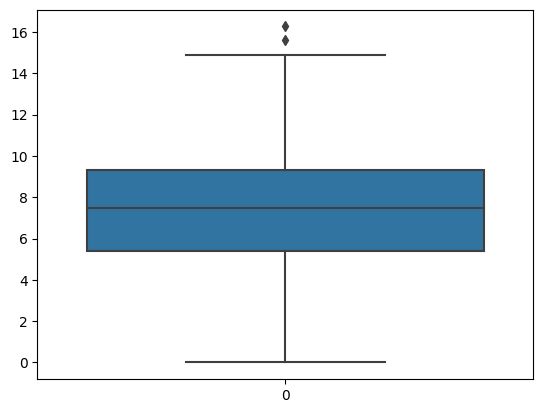

In [12]:
import seaborn as sns
sns.boxplot(df.Sales)

In [13]:
def split(num):
    if num < 5:
        return "low sale"
    elif num>= 5 and num<10:
        return "average sale"
    else:
        return "high sale"    
df.Sales=df.Sales.apply(split)

In [14]:
df["ShelveLoc"].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [15]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,average sale,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high sale,111,48,16,260,83,Good,65,10,Yes,Yes
2,high sale,113,35,10,269,80,Medium,59,12,Yes,Yes
3,average sale,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low sale,141,64,3,340,128,Bad,38,13,Yes,No


C:\Users\I NET\AppData\Local\Temp\ipykernel_1692\2157429118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

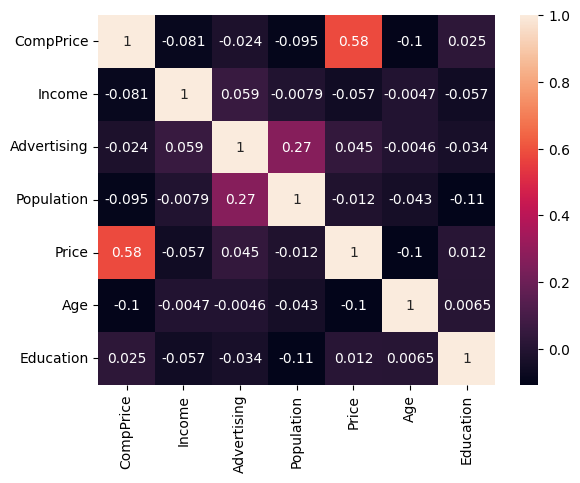

In [17]:
sns.heatmap(df.corr(),annot=True)


In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


In [19]:
df['ShelveLoc']= le.fit_transform(df['ShelveLoc'])
df['Urban']= le.fit_transform(df['Urban'])
df['US']= le.fit_transform(df['US'])

In [20]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,average sale,138,73,11,276,120,0,42,17,1,1
1,high sale,111,48,16,260,83,1,65,10,1,1
2,high sale,113,35,10,269,80,2,59,12,1,1
3,average sale,117,100,4,466,97,2,55,14,1,1
4,low sale,141,64,3,340,128,0,38,13,1,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sales        400 non-null    object
 1   CompPrice    400 non-null    int64 
 2   Income       400 non-null    int64 
 3   Advertising  400 non-null    int64 
 4   Population   400 non-null    int64 
 5   Price        400 non-null    int64 
 6   ShelveLoc    400 non-null    int32 
 7   Age          400 non-null    int64 
 8   Education    400 non-null    int64 
 9   Urban        400 non-null    int32 
 10  US           400 non-null    int32 
dtypes: int32(3), int64(7), object(1)
memory usage: 29.8+ KB


In [22]:
df.shape

(400, 11)

In [25]:
from sklearn.preprocessing import MinMaxScaler
labl=MinMaxScaler()
string_columns=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
for i in string_columns:
    df[i] =labl.fit_transform((df[i].to_numpy()).reshape(-1,1))


In [26]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,average sale,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0
1,high sale,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0
2,high sale,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0
3,average sale,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0
4,low sale,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0


In [29]:
array =df.values
X = df.iloc[:,1:13]
y =  df.iloc[:,0]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=True, random_state=23)
model=DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV


In [34]:

param_grid = [{'max_depth':[5,6,7,6-2,3],'max_features':[10,11,12,13],'min_samples_split':[5,6,7,8,9,10,11,12,13]}]
gsv = GridSearchCV(model,param_grid,cv=10)
gsv.fit(X_train,y_train)
print(gsv.best_params_ , gsv.best_score_ )

{'max_depth': 5, 'max_features': 11, 'min_samples_split': 8} 0.5964387464387464


In [35]:
model = DecisionTreeClassifier(max_depth=5, max_features=11, min_samples_split=8)
model.fit(X_train, y_train)
pred=model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

average sale       0.66      0.94      0.77        81
   high sale       0.73      0.28      0.40        29
    low sale       0.60      0.14      0.22        22

    accuracy                           0.66       132
   macro avg       0.66      0.45      0.46       132
weighted avg       0.66      0.66      0.60       132



In [36]:
model.set_params

<bound method BaseEstimator.set_params of DecisionTreeClassifier(max_depth=5, max_features=11, min_samples_split=8)>

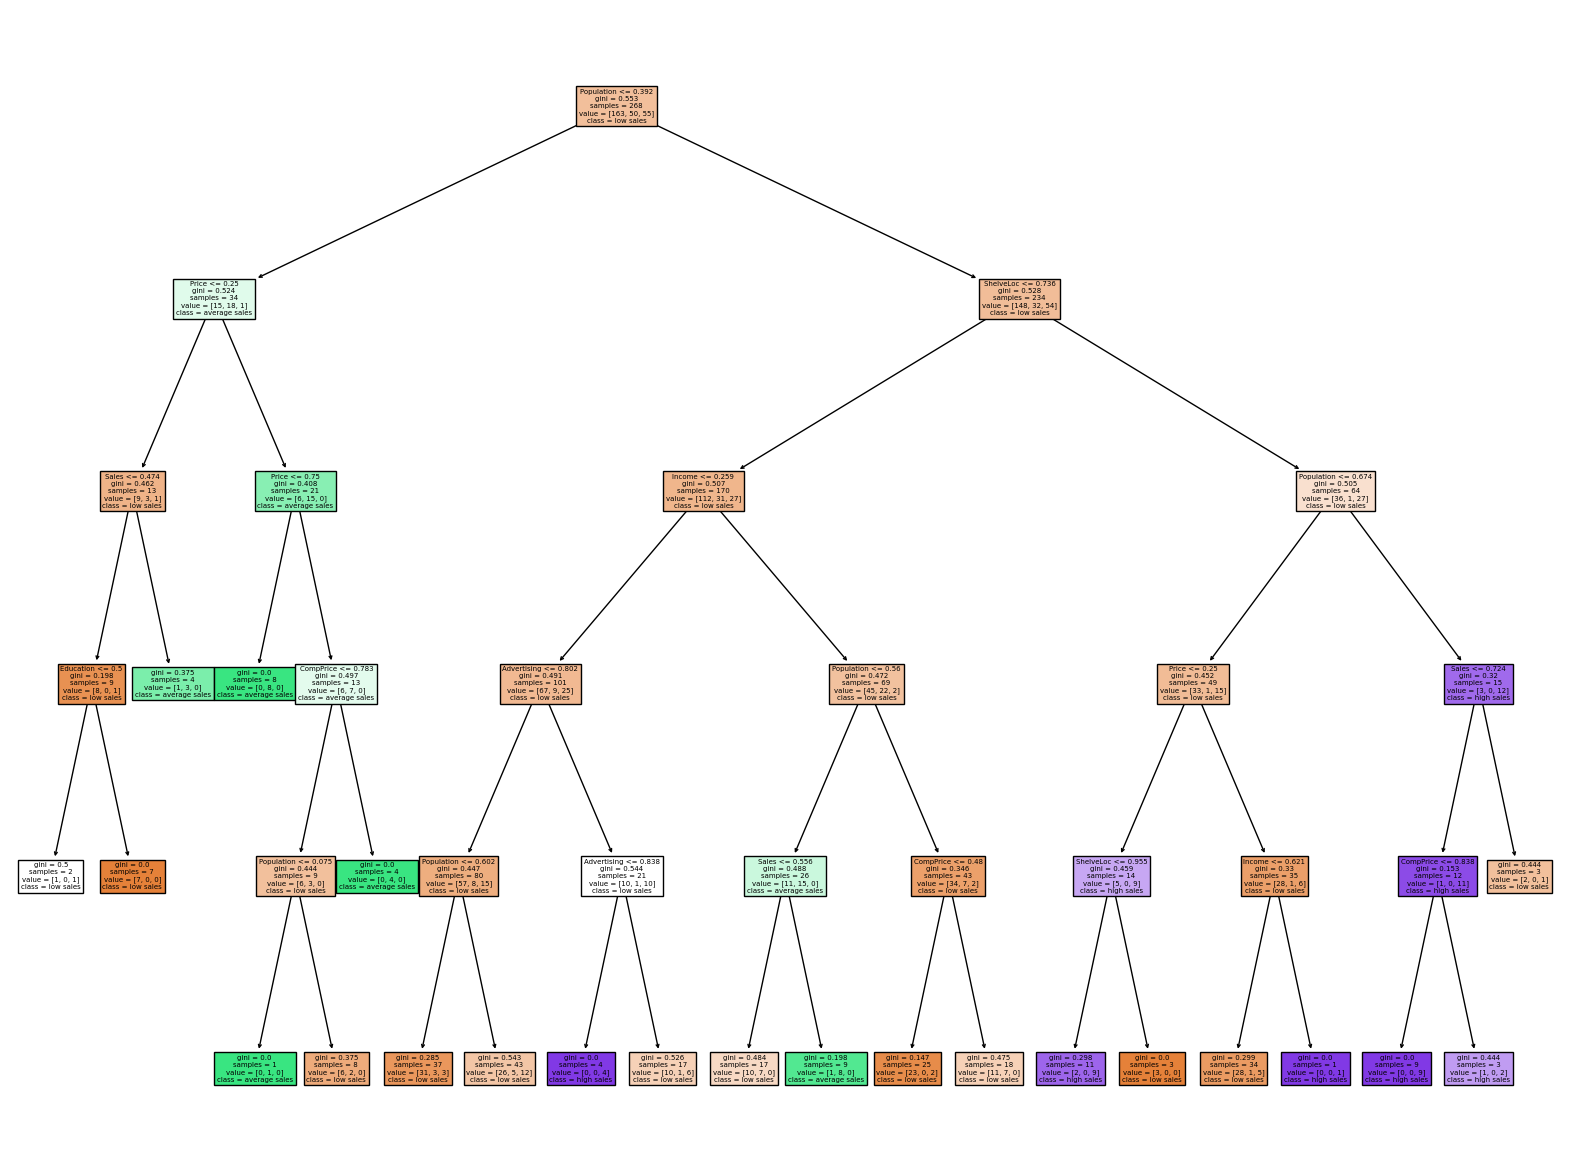

In [37]:
fn = ['Sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn = ['low sales','average sales','high sales']
plt.figure(figsize = (20,15))
plot_tree(model,
          feature_names = fn, 
          class_names = cn,
          filled = True)

plt.show()

In [38]:
model = DecisionTreeClassifier(max_depth=3, max_features=11, min_samples_split=8)
model.fit(X_train, y_train)
pred=model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

average sale       0.67      0.96      0.79        81
   high sale       0.79      0.38      0.51        29
    low sale       1.00      0.05      0.09        22

    accuracy                           0.68       132
   macro avg       0.82      0.46      0.46       132
weighted avg       0.75      0.68      0.61       132



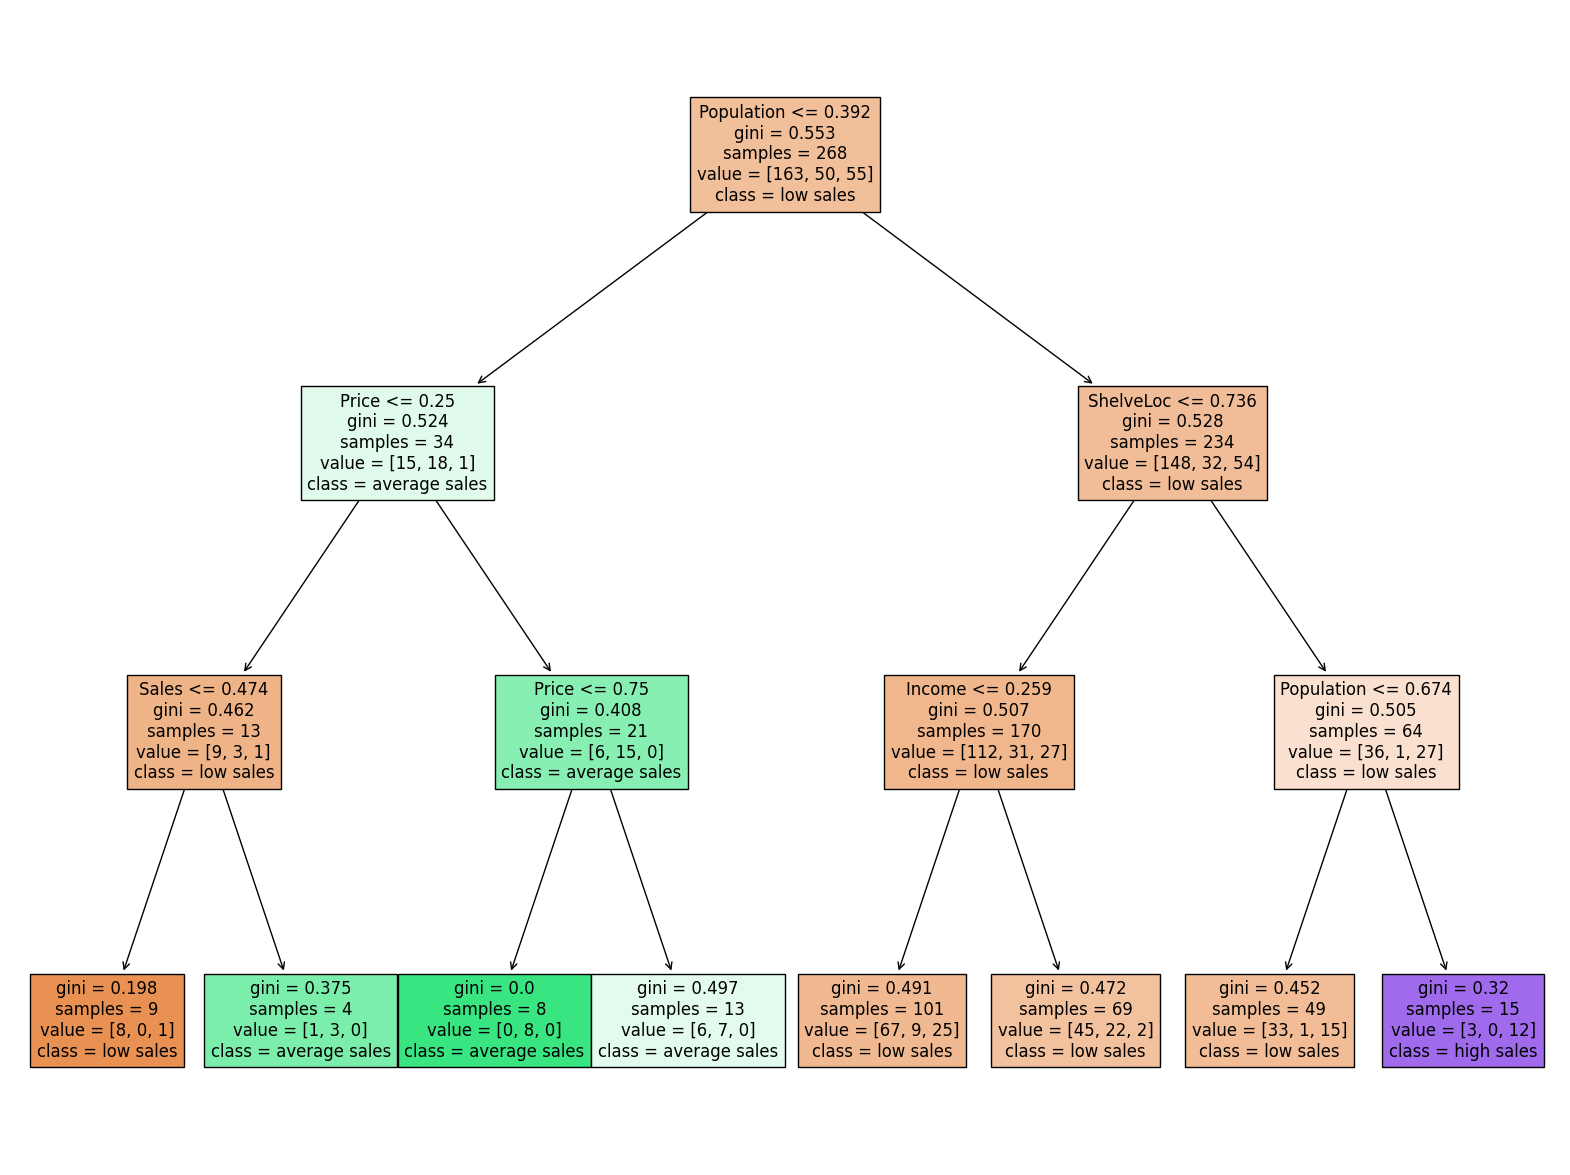

In [39]:
fn = ['Sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn = ['low sales','average sales','high sales']
plt.figure(figsize = (20,15))
plot_tree(model,
          feature_names = fn, 
          class_names = cn,
          filled = True)

plt.show()